<a href="https://colab.research.google.com/github/siddhant8019/stock_market-Prediction/blob/main/StockMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import datetime as dt
from datetime import date
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
start = dt.datetime(2017,1,1)
end = dt.datetime(2023,12,31)
stk_data = yf.download('GOOGL',start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,40.030998,40.571999,39.844501,40.400501,40.400501,39180000
2017-01-04,40.494499,40.671501,40.205502,40.388500,40.388500,30306000
2017-01-05,40.375000,40.687000,40.296001,40.651001,40.651001,26810000
2017-01-06,40.749500,41.448002,40.575001,41.260502,41.260502,40342000
2017-01-09,41.318501,41.521500,41.081001,41.359001,41.359001,28178000
...,...,...,...,...,...,...
2023-12-22,140.770004,141.990005,140.710007,141.490005,141.490005,26514600
2023-12-26,141.589996,142.679993,141.190002,141.520004,141.520004,16780300
2023-12-27,141.589996,142.080002,139.889999,140.369995,140.369995,19628600


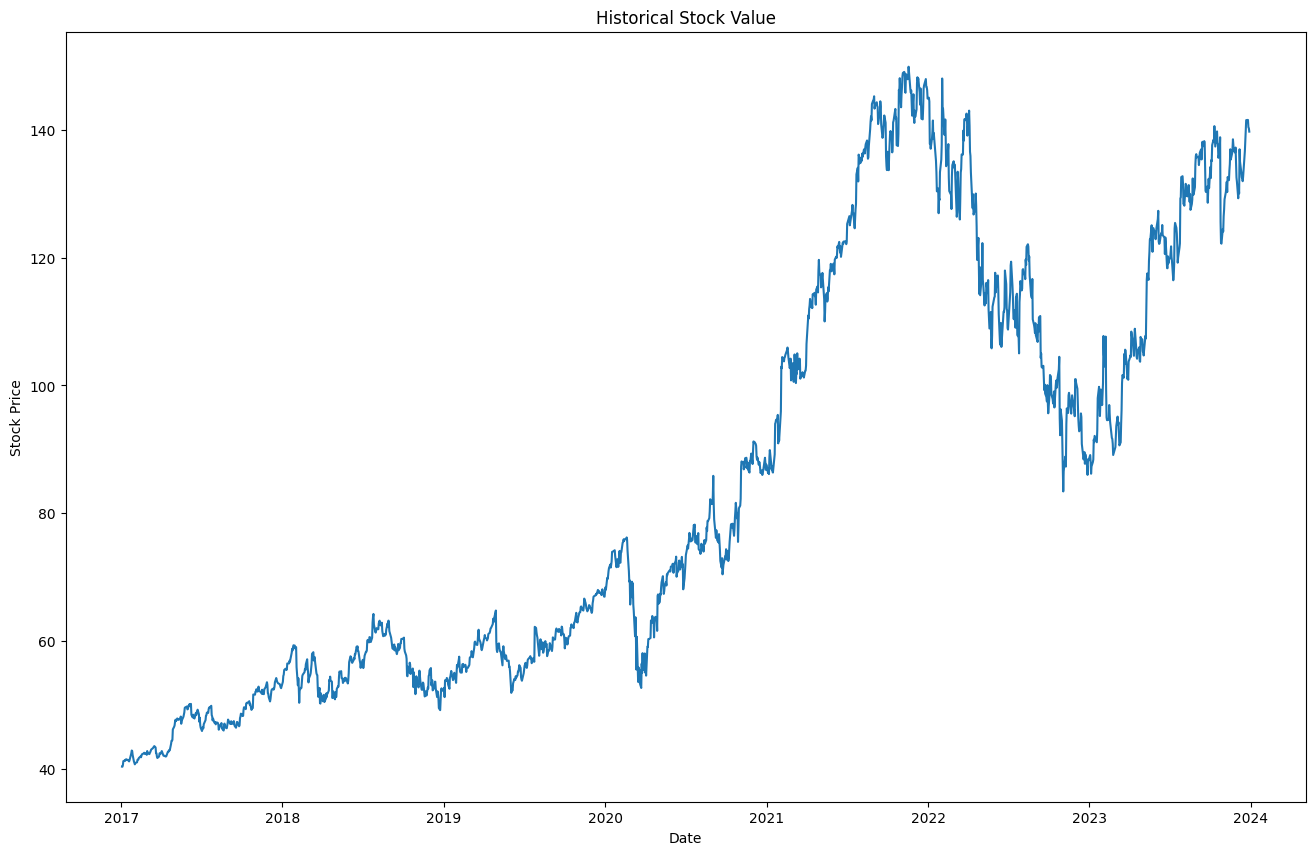

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [ ]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [ ]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 125, batch_size = 32)

Epoch 1/125
45/45 [==============================] - 22s 142ms/step - loss: 0.0251
Epoch 2/125
45/45 [==============================] - 5s 112ms/step - loss: 0.0050
Epoch 3/125
45/45 [==============================] - 5s 111ms/step - loss: 0.0042
Epoch 4/125
45/45 [==============================] - 6s 138ms/step - loss: 0.0039
Epoch 5/125
45/45 [==============================] - 5s 112ms/step - loss: 0.0038
Epoch 6/125
45/45 [==============================] - 7s 154ms/step - loss: 0.0040
Epoch 7/125
45/45 [==============================] - 5s 114ms/step - loss: 0.0038
Epoch 8/125
45/45 [==============================] - 6s 139ms/step - loss: 0.0033
Epoch 9/125
45/45 [==============================] - 5s 110ms/step - loss: 0.0038
Epoch 10/125
45/45 [==============================] - 5s 111ms/step - loss: 0.0032
Epoch 11/125
45/45 [==============================] - 6s 133ms/step - loss: 0.0031
Epoch 12/125
45/45 [==============================] - 5s 110ms/step - loss: 0.0031
Epoch 13/125

In [ ]:
testdataframe = yf.download('GOOGL', start=dt.datetime(2024,3,1), end=dt.datetime(2024,5,1))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 235):
  if i < len(inputs):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


[*********************100%%**********************]  1 of 1 completed


In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

3/3 [==============================] - 2s 31ms/step


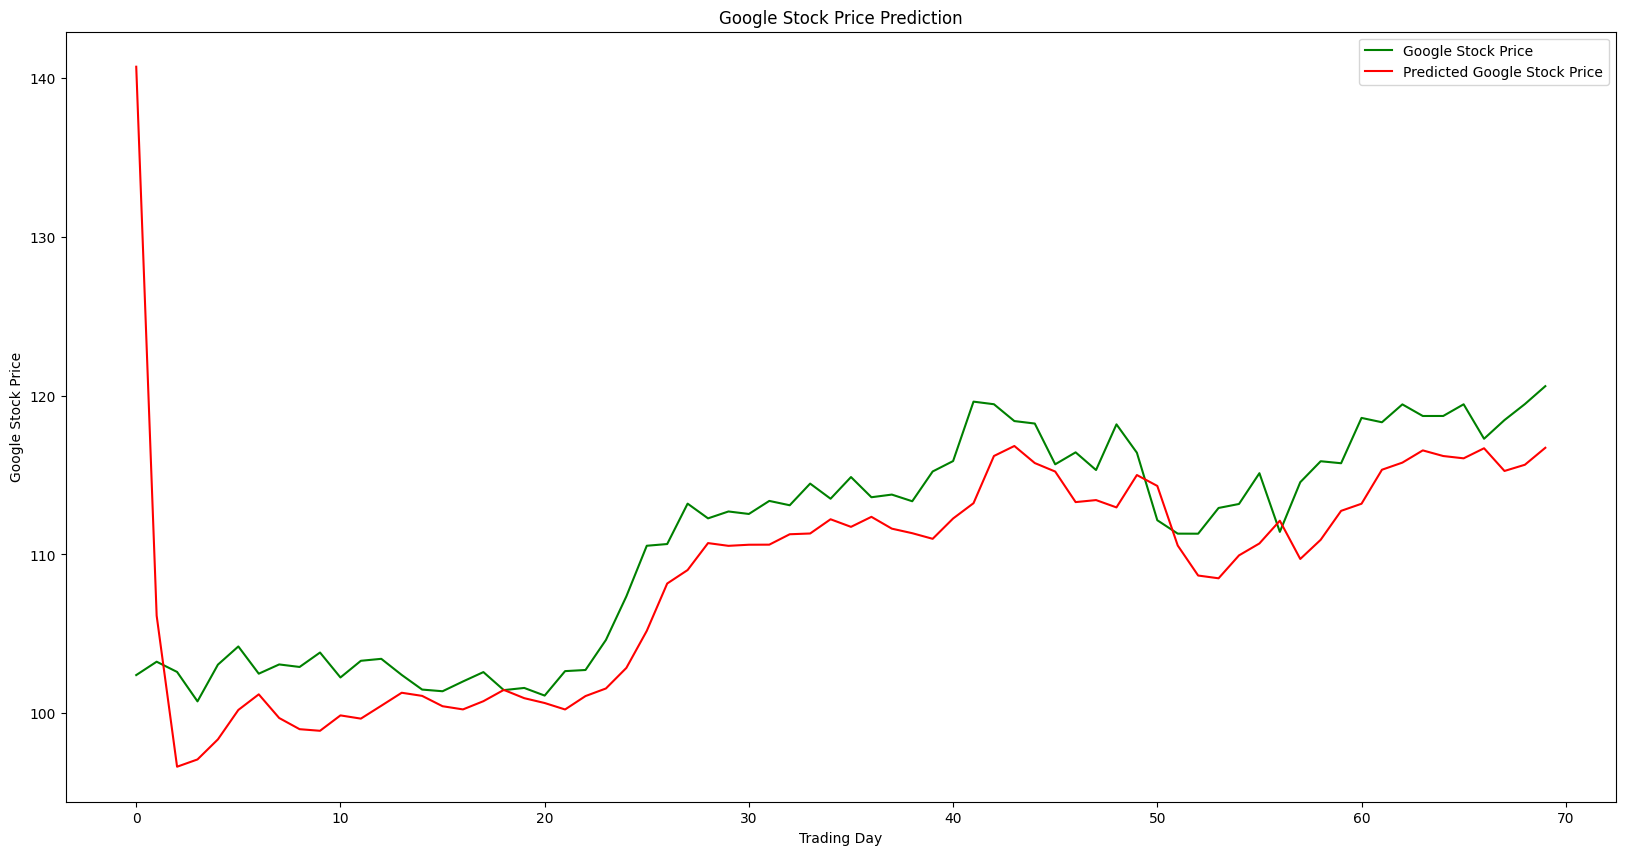

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Google Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()